# UTS - Klasifikasi terhadap data abstrak prodi teknik informatika pta.trunojoyo.ac.id dengan menggunakan model klasifikasi naïve bayes dan KNN 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Load Data

In [12]:
import numpy as np
import pandas as pd

df = pd.read_csv('drive/MyDrive/prosainsdata/tugas/pta-cleaneddatakelas.csv', index_col=0)
df.tail()

,NIM,Nama,Judul,Abstrak,Kelas,token_judul,token_abstrak
793,160411100032,Rachmad Agung Pambudi,penerapan algoritma long short term memory unt...,investasi saham selama ini memiliki resiko ker...,NLP,terap algoritma long short term memory prediks...,investasi saham milik resiko rugi gera harga s...
794,160411100182,Nadila Hidayanti,sistem pencarian teks al quran terjemahan berb...,information retrieval ir merupakan pengambilan...,Komputasi,sistem cari teks al quran terjemah bahasa indo...,information retrieval ir ambil informasi simpa...
795,160411100077,Afni Sakinah,klasifikasi kompleksitas visual citra sampah m...,klasifikasi citra merupakan proses pengelompok...,Komputasi,klasifikasi kompleksitas visual citra sampah k...,klasifikasi citra proses kelompok piksel citra...
796,160411100084,Friska Fatmawatiningrum,identifikasi biner atribut pejalan kaki menggu...,identifikasi atribut pejalan kaki merupakan sa...,NLP,identifikasi biner atribut pejal kaki adaptive...,identifikasi atribut pejal kaki salah teliti k...
797,160411100044,Dian Wibowo,deteksi objek manusia berbasis one stage detec...,topik deteksi objek telah menarik perhatian ya...,Komputasi,deteksi objek manusia bas one stage detector a...,topik deteksi objek tarik perhati kembang tekn...


### Split Fitur dan Target

In [13]:
X = df['token_abstrak']
y = df['Kelas']

### Extracting Feature

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_ekstrak = vectorizer.fit_transform(X)

X_ekstrak.shape

(792, 5965)

### Reduksi menggunakan PCA

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_ekstrak.toarray())
X_train_pca.shape

(792, 10)

### train_test_split

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train_pca, y, test_size=0.2, random_state=42)

### Klasifikasi Model Naive Bayes dan KNN

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

bayes = GaussianNB()
model_bayes = bayes.fit(X_train, y_train)
predictions_bayes = model_bayes.predict(X_test)

KNN = KNeighborsClassifier()
model_KNN = KNN.fit(X_train, y_train)
predictions_KNN = model_KNN.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_test, predictions_bayes))
print(confusion_matrix(y_test, predictions_bayes))
print(classification_report(y_test, predictions_bayes))

print(accuracy_score(y_test, predictions_KNN))
print(confusion_matrix(y_test, predictions_KNN))
print(classification_report(y_test, predictions_KNN))

0.5911949685534591
[[46  4 29]
 [21 10  6]
 [ 4  1 38]]
              precision    recall  f1-score   support

   Komputasi       0.65      0.58      0.61        79
         NLP       0.67      0.27      0.38        37
         RPL       0.52      0.88      0.66        43

    accuracy                           0.59       159
   macro avg       0.61      0.58      0.55       159
weighted avg       0.62      0.59      0.57       159

0.6792452830188679
[[69  3  7]
 [24  7  6]
 [11  0 32]]
              precision    recall  f1-score   support

   Komputasi       0.66      0.87      0.75        79
         NLP       0.70      0.19      0.30        37
         RPL       0.71      0.74      0.73        43

    accuracy                           0.68       159
   macro avg       0.69      0.60      0.59       159
weighted avg       0.68      0.68      0.64       159



### Plotting

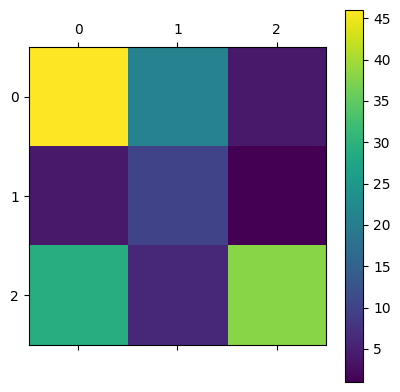

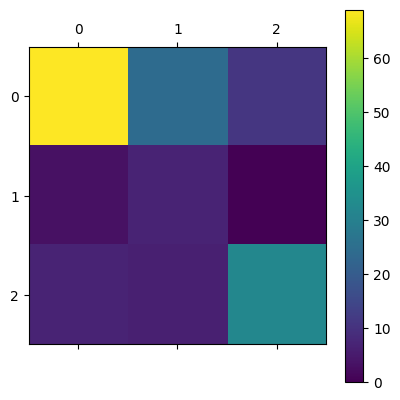

In [23]:
# tampilkan hasil prediksi dalam bentuk confusion matrix
import matplotlib.pyplot as plt

confusion_matrix(predictions_bayes, y_test)
plt.matshow(confusion_matrix(predictions_bayes, y_test))
plt.colorbar()
plt.show()

confusion_matrix(predictions_KNN, y_test)
plt.matshow(confusion_matrix(predictions_KNN, y_test))
plt.colorbar()
plt.show()